In [0]:
import pandas as pd
df = pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/example_data/baseball.csv')

# 11.07


## 과업1

>Position 변수를 count 하시오.

In [4]:
df.Position.value_counts()

C     40
3B    32
2B    31
1B    31
OF    30
SS    30
RF    26
CF    26
LF    25
DH    16
UT    14
O1     4
3S     3
DO     2
OS     2
OD     1
1O     1
2S     1
CS     1
32     1
S3     1
13     1
3O     1
CD     1
23     1
Name: Position, dtype: int64

## 과업2

>df데이터와 ct 데이터 합치시오.

>선수가 16명 이상있는 Position만 (가져오기)

In [0]:
ct = pd.DataFrame(df.Position.value_counts())
ct.reset_index(inplace=True)
ct.columns=['Position', 'count']

In [0]:
df0=pd.merge(df,ct,on='Position',how='inner')

In [0]:
df_ct=df0[df0['count']>=16]

## 과업3

>포지션별 선수연봉 나무상자그림

In [0]:
df_ct = df_ct[df_ct.Salary!='.']

In [0]:
df_ct['Salary']=pd.to_numeric(df_ct.Salary)

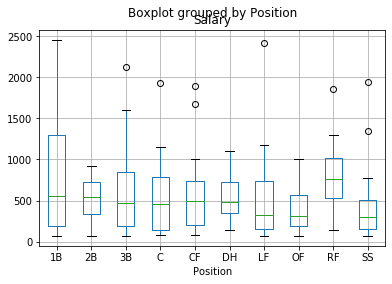

In [10]:
df_ct.boxplot(column= 'Salary', by='Position')

## 과업4

>포지션별 선수연봉 분산분석 하시오

>튜키방법으로 사후검정하시오.

>결론작성하시오.

### 분산분석


귀무가설 : 모든 포지션의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mui

대립가설 : 적어도 한 포지션의 선수연봉은 다르다.

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols    ## 집단 세개 이상의 평균비교 (=분산분석)
results = ols('Salary~Position',data=df_ct).fit()  #데이터~집단
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.926
Date:                Tue, 19 Nov 2019   Prob (F-statistic):             0.0495
Time:                        05:04:42   Log-Likelihood:                -1760.6
No. Observations:                 234   AIC:                             3541.
Df Residuals:                     224   BIC:                             3576.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        786.6667     93.475      8.416      0.000     602.464     970.870
Position[T.2B]  -272.7436    129.627     -2.104      0.036    -528.187     -17.300
Position[T.3B]  -168.7333    125.410     -1.345      0.180    -415.868      78.401
Position[T.C]   -267.6333    125.410     -2.134      0.034    -514.768     -20.499
Position[T.CF]  -220.8406    133.623     -1.653      0.100    -484.159      42.478
Position[T.DH]  -229.7576    166.738     -1.378      0.170    -558.333      98.817
Position[T.LF]  -274.2167    138.646     -1.978      0.049    -547.434      -0.999
Position[T.OF]  -395.8030    135.165     -2.928      0.004    -662.160    -129.446
Position[T.RF]    -5.6667    135.165     -0.042      0.967    -272.024     260.690
Position[T.SS]  -359.0897    129.627     -2.770      0.006    -614.533    -103.646
==============================================================================
Omnibus:                       64.011   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.378
Skew:                           1.335   Prob(JB):                     1.80e-29
Kurtosis:                       5.539   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
aov_table=sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Position,3.634287e+06,9.0,1.925634,0.049487
Residual,4.697330e+07,224.0,NaN,NaN


0.0495는 0.05보다 작으므로 귀무가설을 기각. 즉, 적어도 한 포지션의 선수 연봉은 다르다.

### 튜키방법

귀무가설 : 그룹1 포지션과 그룹2 포지션의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mut

대립가설 : 적어도 그룹1 포지션과 그룹2 포지션의 선수연봉은 다르다.

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(df_ct.Salary, df_ct.Position)
print(mc.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    1B     2B -272.7436 0.5228 -687.0166 141.5294  False
    1B     3B -168.7333    0.9 -569.5304 232.0637  False
    1B      C -267.6333 0.5046 -668.4304 133.1637  False
    1B     CF -220.8406 0.7968 -647.8853 206.2041  False
    1B     DH -229.7576    0.9 -762.6333 303.1182  False
    1B     LF -274.2167 0.5994 -717.3145 168.8812  False
    1B     OF  -395.803  0.104 -827.7753  36.1692  False
    1B     RF   -5.6667    0.9 -437.6389 426.3056  False
    1B     SS -359.0897 0.1533 -773.3627  55.1833  False
    2B     3B  104.0103    0.9 -288.1293 496.1498  False
    2B      C    5.1103    0.9 -387.0293 397.2498  False
    2B     CF    51.903    0.9 -367.0269 470.8329  False
    2B     DH    42.986    0.9  -483.409  569.381  False
    2B     LF   -1.4731    0.9 -436.7555 433.8094  False
    2B     OF -123.0594    0.9 

reject가 모두 False 이므로 귀무가설 채택, 그룹1 포지션과 그룹2 포지션의 선수연봉은 같다.

결론 : 분산분석 결과 요인 수준에 따른 포지션별 평균 차이가 있어도 쌍체 비교에서는 유의한 쌍체 쌍은 없을 수 있음.

전체적으로는 포지션별 선수연봉의 차이가 있지만, 쌍체비교를 통한 포지션별로는 차이가 없음

## 과업5
>포지션별 선수연봉 평균을 출력하시오.(groupdy 사용)

In [14]:
pd.DataFrame(df_ct.groupby('Position').Salary.mean()).sort_values(by='Salary', ascending=False)

,Salary
Position,
1B,786.666667
RF,781.000000
3B,617.933333
CF,565.826087
DH,556.909091
C,519.033333
2B,513.923077
LF,512.450000
SS,427.576923


# 11.12


## 과업1

연봉값을 하는 선수 구하기

In [15]:
ct = pd.DataFrame(df.Position.value_counts())
ct.reset_index(inplace=True)
ct.columns=['Position', 'count']
df0 = pd.merge(df,ct,on='Position',how='inner')
#df1 = df0[df0['count']>=16]
df1 = df0[df0.Salary!='.']
df1['Salary']=pd.to_numeric(df1.Salary)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


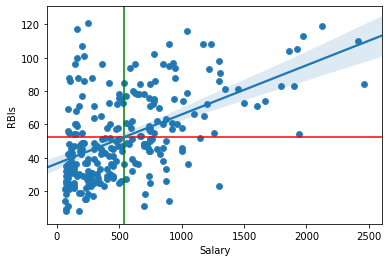

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df1['Salary'], y=df1['RBIs'])
plt.axvline(x=df1['Salary'].mean() , linestyle= '-', color = 'g')
plt.axhline(y=df1['RBIs'].mean() , linestyle= '-', color = 'r')
ax = sns.regplot(x=df1['Salary'], y=df1['RBIs'])

In [17]:
df1[['Salary','RBIs']].corr()

,Salary,RBIs
Salary,1.00000,0.51724
RBIs,0.51724,1.00000


In [18]:
df1.head(5)

,Player_Name,Team,TimesatBat,Hits,HomeRuns,Runs,RBIs,Walks,YearsinMLB,CareerTimesatBat,CareerHits,CareerHome,CareerRuns,CareerRBIs,CareerWalks,League,Division,Position,PutOuts,Assists,Errors,Salary,League2,count
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,475,NW,40
2,"Trevino, Alex",Los Angeles,202,53,4,31,26,27,9,1876,467,15,192,186,161,National,West,C,304,45,11,513,NW,40
3,"Bochy, Bruce",San Diego,127,32,8,16,22,14,8,727,180,24,67,82,56,National,West,C,202,22,2,135,NW,40
5,"Brenly, Bob",San Francisco,472,116,16,60,62,74,6,1924,489,67,242,251,240,National,West,C,518,55,3,600,NW,40
6,"Diaz, Bo",Cincinnati,474,129,10,50,56,40,10,2331,604,61,246,327,166,National,West,C,732,83,13,750,NW,40


In [19]:
import statsmodels.api as sm
y=df1['Salary']
X=sm.add_constant(df1[['RBIs', 'Walks', 'TimesatBat']])
model=sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           9.41e-23
Time:                        05:04:46   Log-Likelihood:                -1926.5
No. Observations:                 263   AIC:                             3861.
Df Residuals:                     259   BIC:                             3875.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.8817     70.143     -0.797      0.426    -194.006      82.242
RBIs           5.8777      1.458      4.032      0.000       3.007       8.748
Walks          6.5073      1.359      4.788      0.000       3.831       9.184
TimesatBat     0.0319      0.274      0.116      0.907      -0.507       0.571
==============================================================================
Omnibus:                       36.802   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.937
Skew:                           0.799   Prob(JB):                     5.86e-14
Kurtosis:                       4.735   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>유의확률이 0.05보다 작으므로 유의함.

Salary가 만불이 증가하면 RBIsrk 0.0295 약 3단위만큼 커져야함.

>Salary 만 보면 됨. P>|t|가 0.00 이므로 매우 유의함. 

>걸음 1단위에 6만5천불 타점 1단위당 5만9천불 정도 오른다.

Salary 만 보면 됨. P>|t|가 0.00 이므로 매우 유의함. 

In [20]:
import math
math.sqrt(0.268) #결정 계수 min70%

0.5176871642217914

### 자료 불러오기

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
player=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/People.csv')
salary=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Salaries.csv')
batter=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Batting.csv')
pitcher=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Pitching.csv')
team=pd.read_csv('/content/drive/My Drive/통계적방법19_박초연/Teams.csv')

In [0]:
ps=pd.merge(salary,player,on='playerID',how='inner')
ps.sort_values(['yearID','playerID'],inplace=True)

In [0]:
bat=pd.merge(ps,batter,on=['yearID','playerID'],how='inner')

In [0]:
pitch=pd.merge(ps,pitcher,on=['yearID','playerID'],how='inner')

In [0]:
bat2 = bat.drop_duplicates(['playerID','yearID'], keep=False)

In [0]:
pitch2 = pitch.drop_duplicates(['playerID','yearID'], keep=False)
pitch2 = pitch2[(pitch2.stint==1)]

## 2016

In [28]:
import pandas as pd

bat216=bat2[(bat2.yearID==2016)]
bat16 = bat216[(bat216.salary <= bat216.salary.quantile(0.75)) & (bat216.salary >= bat216.salary.quantile(0.25))]
bat16.shape

(369, 48)

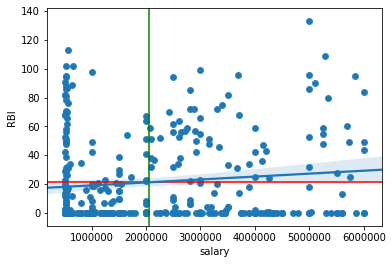

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=bat16['salary'], y=bat16['RBI'])
plt.axvline(x=bat16['salary'].mean() , linestyle= '-', color = 'g')
plt.axhline(y=bat16['RBI'].mean() , linestyle= '-', color = 'r')
ax = sns.regplot(x=bat16['salary'], y=bat16['RBI'])

In [30]:
bat16['B23'] = bat16['2B'] + bat16['3B']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
bat16.corr()

,yearID,salary,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,B23
yearID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,NaN,1.000000,-0.221827,-0.023874,-0.066686,-1.0,1.0,1.0,0.116491,-0.004337,NaN,0.121730,0.103596,0.095104,0.110980,0.113721,0.039705,0.087291,0.111421,0.070735,0.049199,0.127744,0.061562,0.151623,0.070628,0.016802,0.119720,0.132085,0.107482
birthYear,NaN,-0.221827,1.000000,-0.120074,-0.141645,-1.0,1.0,1.0,-0.149995,-0.062646,NaN,0.181103,0.254445,0.262388,0.259310,0.249404,0.191217,0.251468,0.261070,0.184227,0.234491,0.212559,0.245830,0.170041,0.133461,0.104744,0.204643,0.174469,0.252042
birthMonth,NaN,-0.023874,-0.120074,1.000000,0.035979,-1.0,1.0,1.0,-0.049184,-0.039868,NaN,0.097180,0.071894,0.087132,0.070682,0.054872,0.099558,0.079391,0.081403,0.100162,0.035896,0.086061,0.064506,0.041156,-0.009050,0.025801,0.065376,0.118080,0.064462
birthDay,NaN,-0.066686,-0.141645,0.035979,1.000000,-1.0,1.0,1.0,0.110609,0.011677,NaN,-0.069707,-0.089635,-0.108881,-0.110759,-0.133383,-0.032754,-0.088794,-0.108784,-0.084441,-0.118747,-0.062223,-0.035000,0.026272,-0.063349,0.015702,-0.077117,-0.082233,-0.123900
deathYear,NaN,-1.000000,-1.000000,-1.000000,-1.000000,1.0,-1.0,-1.0,-1.000000,-1.000000,NaN,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,NaN,NaN,-1.000000,-1.000000,NaN,NaN,-1.000000,NaN,-1.000000,-1.000000
deathMonth,NaN,1.000000,1.000000,1.000000,1.000000,-1.0,1.0,1.0,1.000000,1.000000,NaN,-1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000
deathDay,NaN,1.000000,1.000000,1.000000,1.000000,-1.0,1.0,1.0,1.000000,1.000000,NaN,-1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000
weight,NaN,0.116491,-0.149995,-0.049184,0.110609,-1.0,1.0,1.0,1.000000,0.553835,NaN,-0.125136,-0.181098,-0.191262,-0.194132,-0.154800,-0.334218,0.002766,-0.074348,-0.324589,-0.309579,-0.098483,-0.085879,-0.025802,-0.091588,-0.292283,-0.088679,-0.112210,-0.190216
height,NaN,-0.004337,-0.062646,-0.039868,0.011677,-1.0,1.0,1.0,0.553835,1.000000,NaN,-0.247936,-0.306539,-0.281605,-0.303156,-0.275137,-0.314723,-0.143332,-0.218731,-0.295817,-0.298371,-0.214962,-0.210643,-0.104817,-0.211762,-0.178159,-0.219521,-0.247212,-0.294311


In [32]:
import statsmodels.api as sm
y=bat16['salary']
X=sm.add_constant(bat16[['HR','CS','IBB','SB','RBI','SH','GIDP']])  #,'SF','BB','B23','G','AB'
model=sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.726
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.102
Time:                        05:05:32   Log-Likelihood:                -5792.9
No. Observations:                 369   AIC:                         1.160e+04
Df Residuals:                     361   BIC:                         1.163e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.909e+06   1.11e+05     17.200      0.000    1.69e+06    2.13e+06
HR          -1.25e+04   2.93e+04     -0.426      0.670   -7.01e+04    4.51e+04
CS         -5.491e+04   6.51e+04     -0.843      0.400   -1.83e+05    7.31e+04
IBB         9.611e+04   4.69e+04      2.051      0.041    3961.509    1.88e+05
SB          1.231e+04   1.95e+04      0.631      0.529   -2.61e+04    5.07e+04
RBI        -1004.6386   1.23e+04     -0.081      0.935   -2.53e+04    2.32e+04
SH         -1.781e+04   4.71e+04     -0.378      0.705    -1.1e+05    7.48e+04
GIDP        5.013e+04    3.6e+04      1.393      0.165   -2.06e+04    1.21e+05
==============================================================================
Omnibus:                       37.075   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.547
Skew:                           0.785   Prob(JB):                     9.51e-10
Kurtosis:                       2.516   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""